<a href="https://colab.research.google.com/github/sejalbahirat/Bike_Sharing_Analysis/blob/main/Bike_Sharing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# Dimension of the data
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')
print()

# To check the data type of the columns
data.info()

The data has 730 rows and 16 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Find the null values in the data
data.isnull().sum()         # count of missing value in each col

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
data.isnull().mean()*100    # percentage of missing value

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [ ]:
# data duplicates
data[data.duplicated()].shape[0]

0

In [ ]:
# data sample
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
len(list(data.columns))

16

In [ ]:
len(set(list(data.columns))) #If duplicates then no. wont be same as above

16

In [ ]:
# rename the columns
data.rename(columns={'yr': 'year', 'mnth': 'month',
                     'temp': 'temperature', 'hum':'humidity',
                     'dteday': 'date', 'cnt': 'count'}, inplace=True)

# data sample
data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
del data['instant']

In [ ]:
# To check unique values of the columns
data['season'].unique()

array([1, 2, 3, 4])

In [ ]:
for cols in ['season', 'month', 'weekday', 'weathersit']:
  print(cols, data[cols].unique())

season [1 2 3 4]
month [ 1  2  3  4  5  6  7  8  9 10 11 12]
weekday [6 0 1 2 3 4 5]
weathersit [2 1 3]


In [ ]:
# Mapping season
data.season.replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)

In [ ]:
# Mapping month
data.month.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun', 7: 'Jul',
                    8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}, inplace = True)

# Mapping weekday
data.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'}, inplace = True)

# Mapping weathersit
data.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snow'}, inplace = True)

In [ ]:
# data sample
data.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,count
0,01-01-2018,spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Univariate Analysis

In [ ]:
# Analysing a single column at a time (without comparing with another).
# Box Plot and 5-Number Summary: Visualize the distribution and identify outliers.
# Data Distribution: Use density plots and histograms to understand the distribution shape.
# Statistical Measures: Calculate and interpret the mean and mode to understand central tendencies.

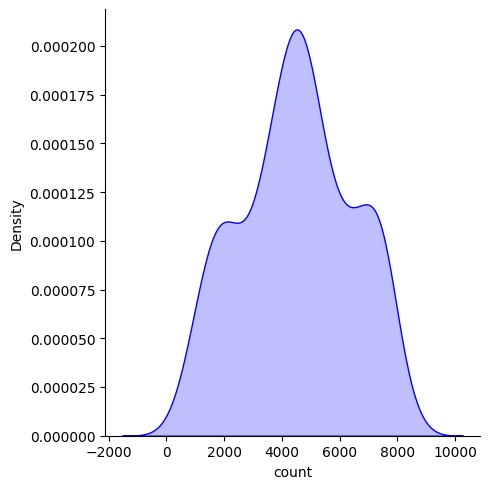

In [ ]:
# univariate on target column
sns.displot(data['count'], kind='kde', color='b', fill=True)
plt.show()

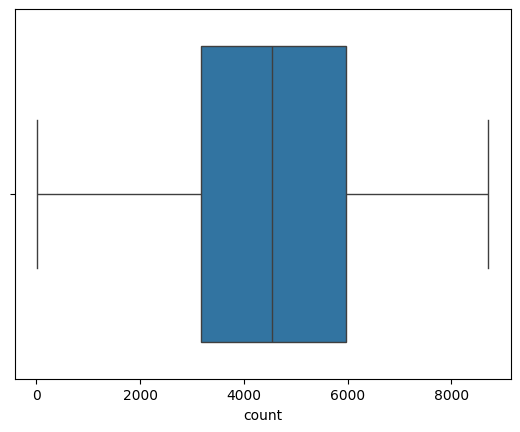

In [ ]:
# Boxplot for count column
sns.boxplot(data['count'], orient='h')
plt.show()

In [ ]:
# To get stats summary of the data
data.describe()

,year,holiday,workingday,temperature,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


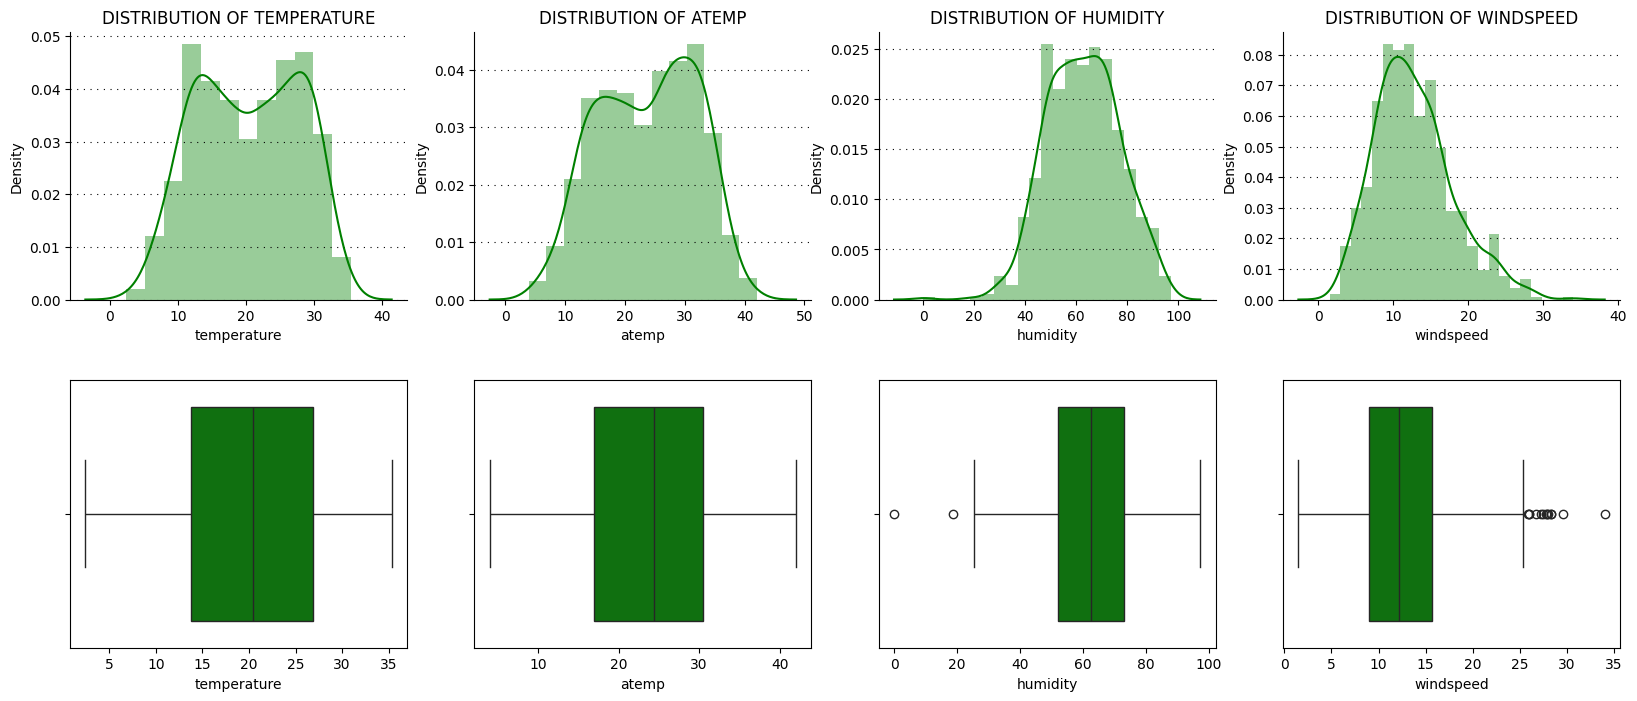

In [ ]:
# creating subplots
fig = plt.figure(figsize=(20, 8))
spec = fig.add_gridspec(2,4)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])

# plotting the graph
dist_sec = [sec_01, sec_02, sec_03, sec_04]
box_sec = [sec_05, sec_06, sec_07, sec_08]
cnt=0
for cols in ['temperature', 'atemp', 'humidity', 'windspeed']:
    sns.distplot(data[cols], ax=dist_sec[cnt], color='g')
    dist_sec[cnt].set_title('DISTRIBUTION OF '+cols.upper())
    dist_sec[cnt].grid(color='black', ls=':', axis='y', dashes=(1,5))
    sns.boxplot(data[cols], orient='h', ax=box_sec[cnt], color='g')
    cnt += 1

# removing the spines
for selection in [sec_01, sec_02, sec_03, sec_04]:
    selection.spines['top'].set_visible(False)
    selection.spines['right'].set_visible(False)


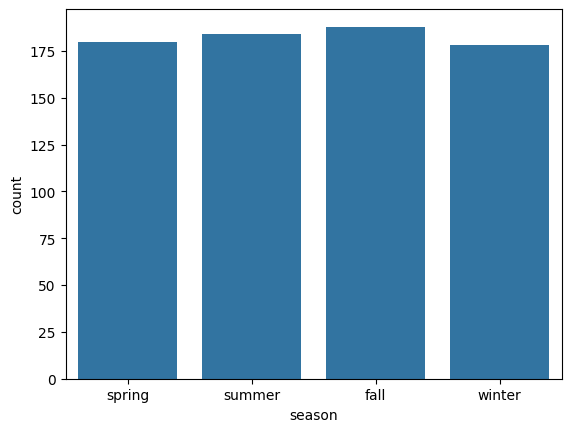

In [ ]:
# univariate on categorical data
sns.countplot(data=data, x='season')
plt.show()

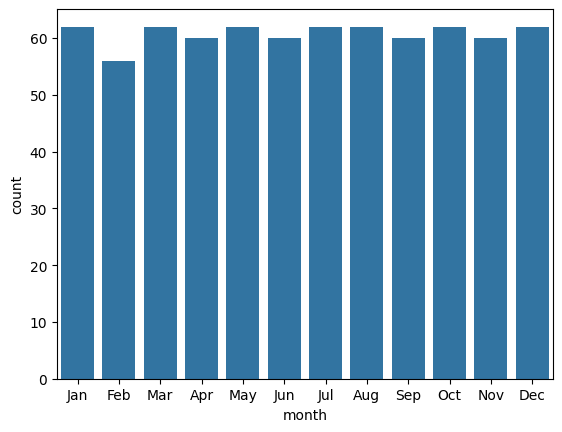

In [ ]:
# univariate on categorical data
sns.countplot(data=data, x='month')
plt.show()

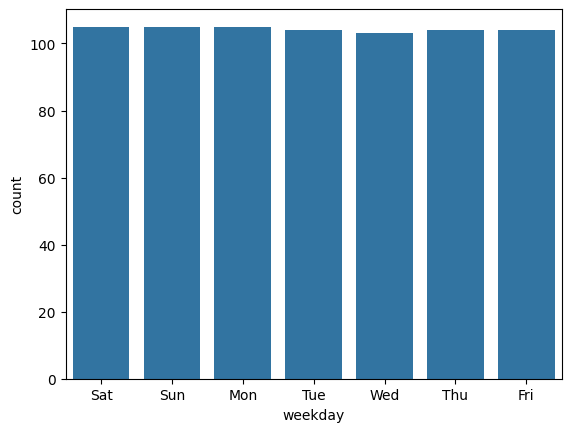

In [ ]:
# univariate on categorical data
sns.countplot(data=data, x='weekday')
plt.show()

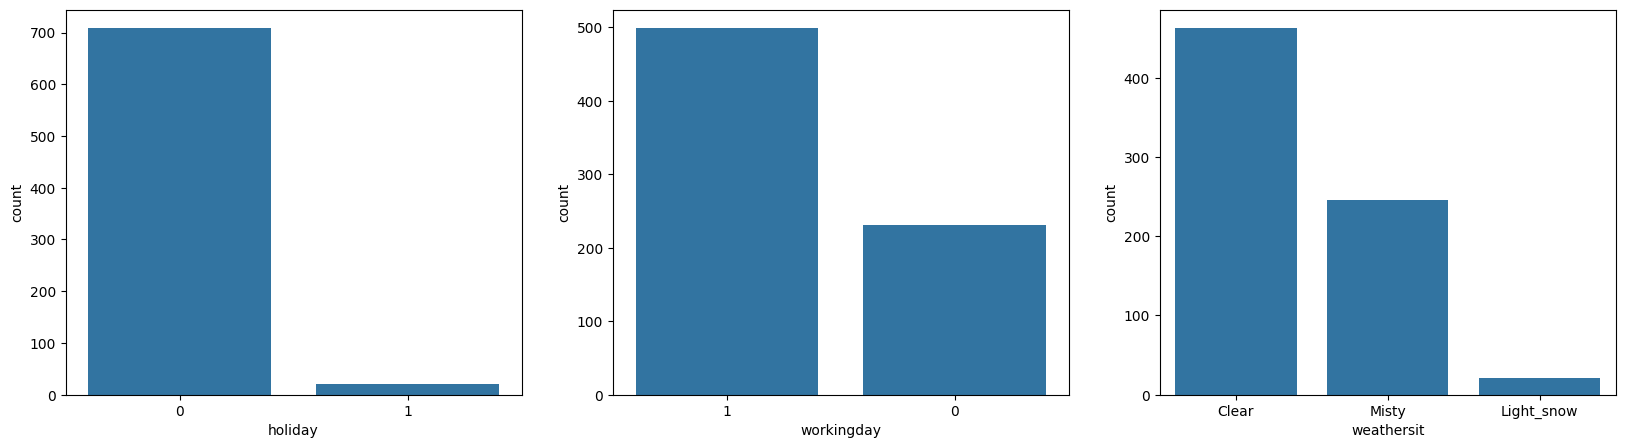

In [ ]:
# univariate on categorical data
# creating subplots
fig = plt.figure(figsize=(20, 5))
spec = fig.add_gridspec(1,3)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])

# plotting the graph
cnt_sec = [sec_01, sec_02, sec_03]
cnt = 0
for cols in ['holiday', 'workingday', 'weathersit']:
    sns.countplot(data, x=cols, ax=cnt_sec[cnt], order=data[cols].value_counts().index)
    cnt += 1

### Bi-Variate Analysis

<Axes: >

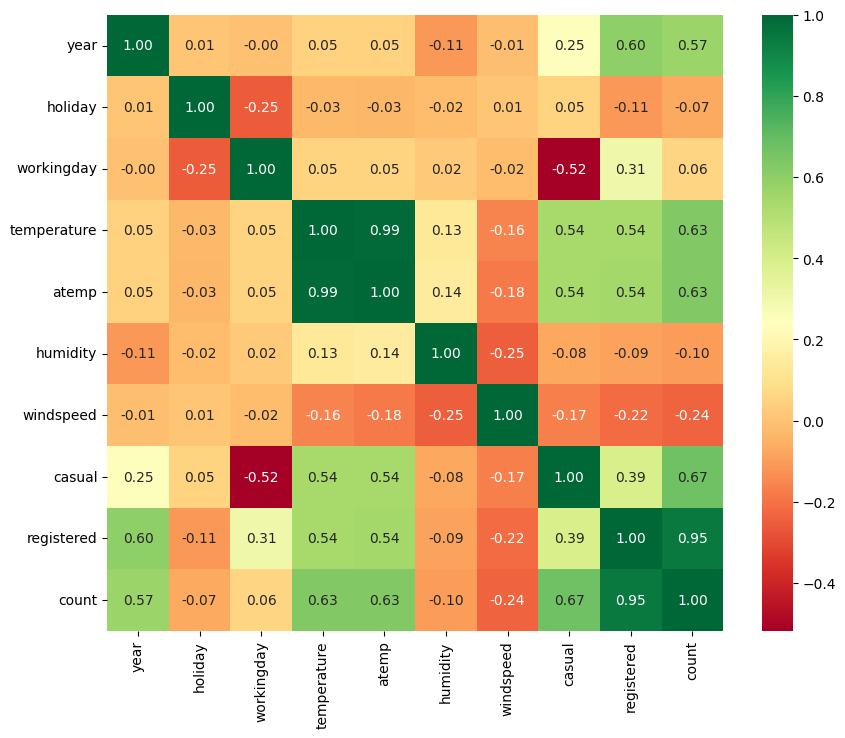

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), fmt='.2f',
            annot=True, cmap='RdYlGn', square=True)

# from matplotlib import colormaps
# list(colormaps)

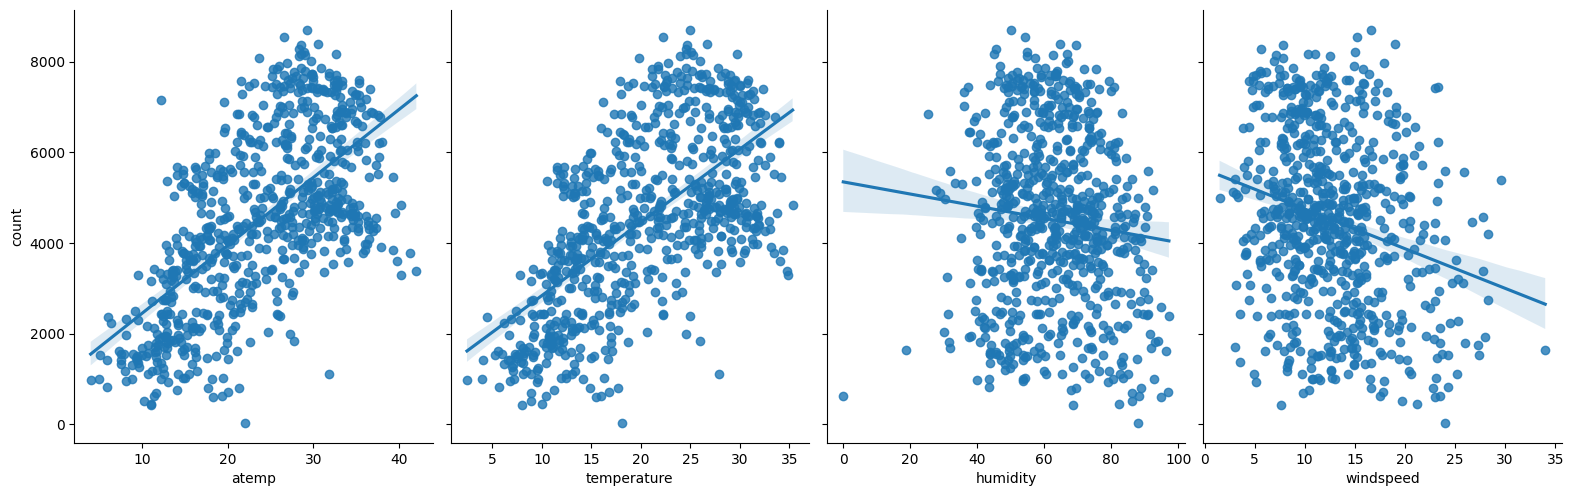

In [ ]:
# continious variable with target
sns.pairplot(data, x_vars=['atemp', 'temperature', 'humidity', 'windspeed'],
             y_vars=['count'], kind='reg', height=5, aspect=0.8)
plt.show()

In [ ]:
# INFERENCE:

# Temperature and Atemp: There is a strong positive correlation with rental demand. As temperature and atemperature rise, rental demand increases.
# Humidity: There is a slight negative correlation. Higher humidity slightly decreases rental demand.
# Windspeed: There is a negative correlation. Increased windspeed leads to lower rental demand.

# In summary, warmer temperatures boost rental demand, while higher humidity and windspeed tend to decrease it.

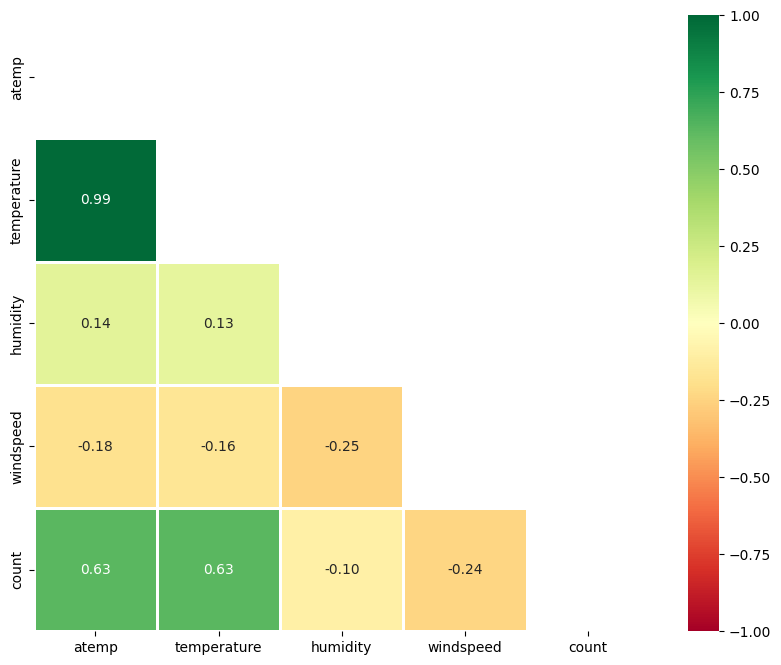

In [ ]:
feats = ['atemp', 'temperature', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(10,8))
sns.heatmap(data[feats].corr(),
            annot=True ,
            fmt='.2f',
            vmax=1,
            vmin=-1,
            mask=np.triu(data[feats].corr()),
            linewidths=1,
            linecolor = 'white',
            square=True,
            cmap='RdYlGn')

plt.show()